# Straight step index fibers

In [17]:
import pyMMF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('figure', figsize=(18,9))
rc('text', usetex=True)
from IPython.display import display, Math

'/home/spopoff/dev/pyMMF/pyMMF/__init__.py'

## 1. Fiber parameters

In [18]:
## Parameters
NA = 0.15
radius = 10. # in microns
areaSize = 3.5*radius # calculate the field on an area larger than the diameter of the fiber
npoints = 2**8 # resolution of the window
n1 = 1.45
wl = 0.6328 # wavelength in microns

## 2. Compute the mode with three different solvers

### 2.1 Index profile

In [19]:
# Create the fiber object
profile = pyMMF.IndexProfile(npoints = npoints, areaSize = areaSize)

# Initialize the index profile
profile.initStepIndex(n1=n1,a=radius,NA=NA)

# Instantiate the solver
solver = pyMMF.propagationModeSolver()

# Set the profile to the solver
solver.setIndexProfile(profile)

# Set the wavelength
solver.setWL(wl)

# Estimate the number of modes for a graded index fiber
Nmodes_estim = pyMMF.estimateNumModesSI(wl,radius,NA,pola=1)

print(f"Estimated number of modes using the V number = {Nmodes_estim}")

2024-09-10 13:03:17,590 - pyMMF.core [DEBUG  ]  Debug mode ON.


<function IndexProfile.initStepIndex.<locals>.radialFunc at 0x7d436acd9c60>
Estimated number of modes using the V number = 56


### 2.2 Semi-analytical solution: `SI` solver

In [20]:
modes_semianalytical = solver.solve(solver = 'SI', curvature = None)

2024-09-10 13:03:17,599 - pyMMF.solv [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2024-09-10 13:03:18,330 - pyMMF.solv [INFO   ]  Found 59 modes in 0.73 seconds.
2024-09-10 13:03:18,330 - pyMMF.solv [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.
2024-09-10 13:03:21,794 - pyMMF.solv [INFO   ]  Found 59 LP mode profiles in 0.1 minutes.
2024-09-10 13:03:21,796 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


### 2.3 Solving the 2d Eigenvalue solver: `eig` solver (slow) 
See the [tutorial](https://www.wavefrontshaping.net/post/id/3) 
for more information.

In [21]:
eig_solver_options = {
    'boundary' : 'close',
    'nmodesMax' :Nmodes_estim+10,
    'propag_only' : True,
}

In [22]:
modes_eig = solver.solve(
    solver = 'eig',
    curvature = None,
    options = eig_solver_options
    )

2024-09-10 13:03:21,809 - pyMMF.solv [INFO   ]  Solving the spatial eigenvalue problem for mode finding.
2024-09-10 13:03:21,811 - pyMMF.solv [INFO   ]  Use close boundary condition.
2024-09-10 13:04:34,155 - pyMMF.solv [INFO   ]  Solver found 59 modes is 72.35 seconds.
2024-09-10 13:04:34,161 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


### 2.4 Finding the 1d radial solution: `radial` solver (fast, more precise)
See the [tutorial](https://www.wavefrontshaping.net/post/id/66)
and the article [Learning and avoiding disorder in multimode fibers](https://arxiv.org/abs/2010.14813) 
for more information.

In [23]:
radial_solver_options = {
    'N_beta_coarse' : 1_000,
}

In [24]:
modes_radial = solver.solve(solver = 'radial',  
                         options = radial_solver_options)

2024-09-10 13:04:34,177 - pyMMF.solv [INFO   ]  Searching for modes with beta_min=14.320067508393146, beta_max=14.397311465566371
2024-09-10 13:04:34,197 - pyMMF.solv [INFO   ]  Found 5 radial mode(s) for m=0
2024-09-10 13:04:34,198 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2024-09-10 13:04:34,203 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 2
2024-09-10 13:04:34,207 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 3
2024-09-10 13:04:34,211 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 4
2024-09-10 13:04:34,215 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 5
2024-09-10 13:04:34,223 - pyMMF.solv [INFO   ]  Found 4 radial mode(s) for m=1
2024-09-10 13:04:34,224 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2024-09-10 13:04:34,230 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 2


2024-09-10 13:04:34,235 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 3
2024-09-10 13:04:34,239 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 4
2024-09-10 13:04:34,250 - pyMMF.solv [INFO   ]  Found 4 radial mode(s) for m=2
2024-09-10 13:04:34,251 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2024-09-10 13:04:34,256 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 2
2024-09-10 13:04:34,260 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 3
2024-09-10 13:04:34,265 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 4
2024-09-10 13:04:34,276 - pyMMF.solv [INFO   ]  Found 4 radial mode(s) for m=3
2024-09-10 13:04:34,276 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2024-09-10 13:04:34,281 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 2
2024-09-10 13:04:34,286 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 3
2024-09-10 13:04:34,291

## 3. Comparing results

### 3.1 Dispersion

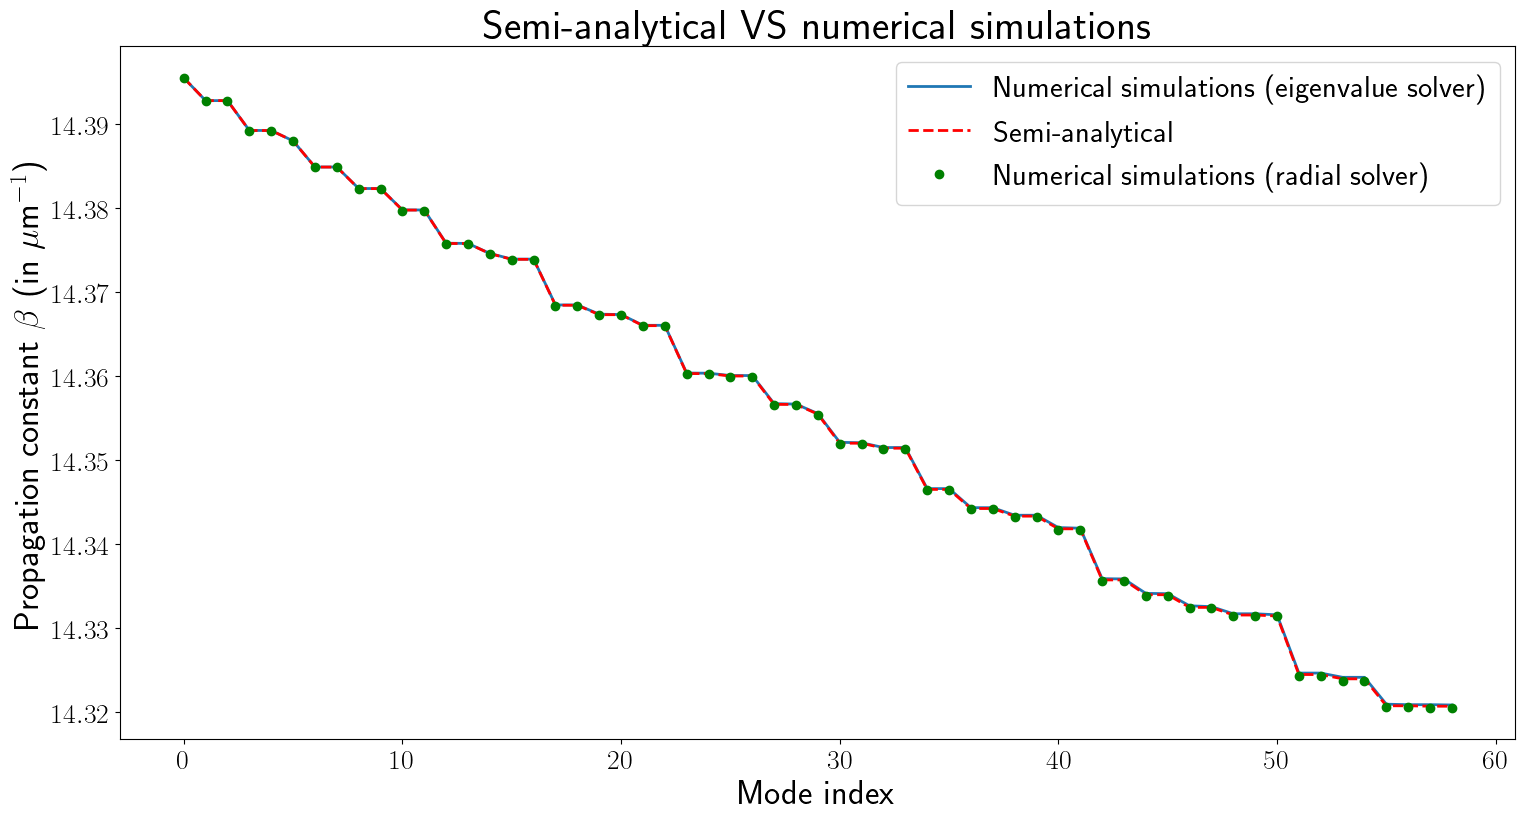

In [25]:
# Sort the modes
modes_eig.sort()
modes_semianalytical.sort()
modes_radial.sort()

modes = {}
modes['SA'] = {'betas':np.array(modes_semianalytical.betas),'profiles':modes_semianalytical.profiles}
modes['eig'] = {'betas':np.array(modes_eig.betas),'profiles':modes_eig.profiles}
modes['radial'] = {'betas':np.array(modes_radial.betas),'profiles':modes_radial.profiles}


plt.figure(); 
plt.plot(np.real(modes_eig.betas),
         label='Numerical simulations (eigenvalue solver)',
         linewidth=2.)
plt.plot(np.real(modes_semianalytical.betas),
         'r--',
         label='Semi-analytical',
         linewidth=2.)
plt.plot(np.real(modes_radial.betas),
         'go',
         label='Numerical simulations (radial solver)',
         linewidth=2.)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'Semi-analytical VS numerical simulations' ,fontsize = 30)
plt.ylabel(r'Propagation constant $\beta$ (in $\mu$m$^{-1}$)', fontsize = 25)
plt.xlabel(r'Mode index', fontsize = 25)
plt.legend(fontsize = 22,loc='upper right')
plt.show()

### 2.2 Comparing numerical solutions to LP modes

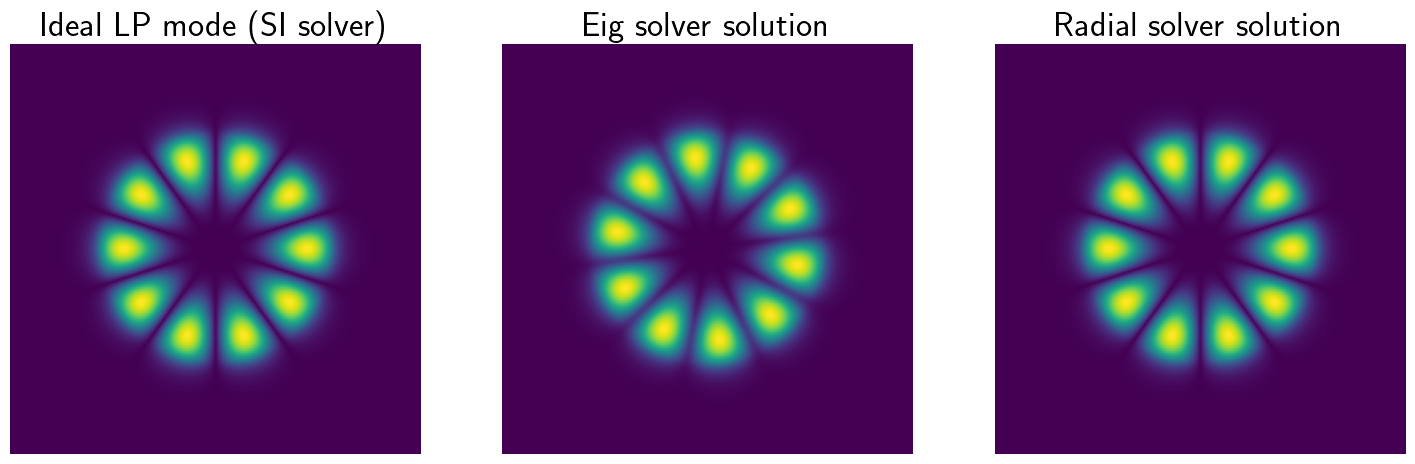

In [26]:
imode = 15
plt.figure()
plt.subplot(131)
plt.imshow(np.abs(modes['SA']['profiles'][imode].reshape([npoints]*2)))
plt.gca().set_title("Ideal LP mode (SI solver)",fontsize=25)
plt.axis('off')
plt.subplot(132)
plt.imshow(np.abs(modes['eig']['profiles'][imode].reshape([npoints]*2)))
plt.gca().set_title("Eig solver solution",fontsize=25)
plt.axis('off')
plt.subplot(133)
plt.imshow(np.abs(modes['radial']['profiles'][imode].reshape([npoints]*2)))
plt.gca().set_title("Radial solver solution",fontsize=25)
plt.axis('off')